# Datasets with PyTorch
In this section we'll show how to:
* load data from outside files
* build random batches using PyTorch's <a href='https://pytorch.org/docs/stable/data.html'><strong><tt>data</tt></strong></a> utilities<br>

At the end we'll briefly mention <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>.

## Perform standard imports

In [0]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns
sns.set_style('whitegrid')

load# Loading data from files
We've seen how to load NumPy arrays into PyTorch, and anyone familiar with <tt>pandas.read_csv()</tt> can use it to prepare data before forming tensors. Here we'll load the <a href='https://en.wikipedia.org/wiki/Iris_flower_data_set'>iris flower dataset</a> saved as a .csv file.

Since we are using Google's Colab, we will use the below code to load our iris dataset. You can igonre the next two code block and load your file directly to pandas dataframe.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (3).csv


In [4]:
df = pd.read_csv(io.StringIO(uploaded['iris.csv'].decode('utf-8')))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
df.shape

(150, 5)

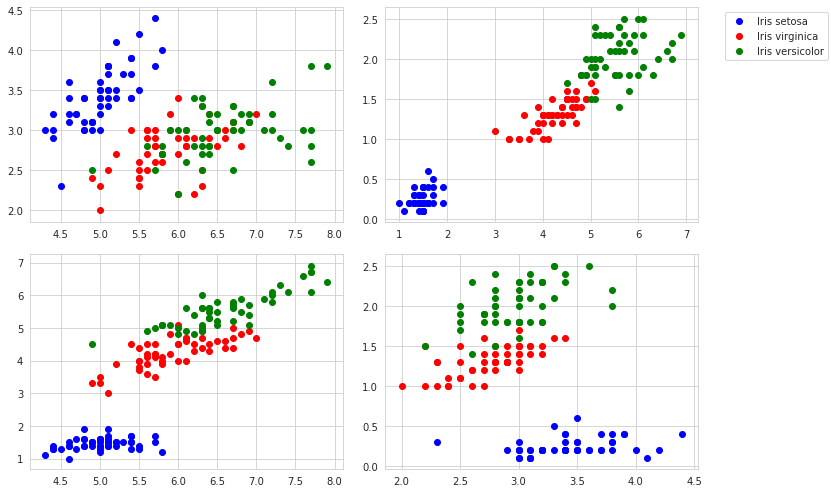

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()        

The iris dataset consists of 50 samples each from three species of Iris (<em>Iris setosa</em>, <em>Iris virginica</em> and <em>Iris versicolor</em>), for 150 total samples. We have four features (sepal length & width, petal length & width) and three unique labels:
0. <em>Iris setosa</em>
1. <em>Iris virginica</em>
2. <em>Iris versicolor</em>

### The classic method for building train/test split tensors
Before introducing PyTorch's Dataset and DataLoader classes, we'll take a quick look at the alternative.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 1).values,
                                                    df['target'].values,
                                                    test_size = 0.2,
                                                    random_state = 33)


X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)

In [8]:
print(f'Training size: {len(y_train)}')
labels, counts = y_train.unique(return_counts=True)
print(f'Labels: {labels}\nCounts: {counts}')

Training size: 120
Labels: tensor([0, 1, 2])
Counts: tensor([42, 42, 36])


NOTE: The importance of a balanced training set is discussed in A systematic study of the class imbalance problem in convolutional neural networks by Mateusz Buda, Atsuto Maki, Maciej A. Mazurowski (10/15/17, latest rev 10/13/18) https://arxiv.org/abs/1710.05381
For example, the authors show that oversampling a less common class so that it matches the more common classes is always the preferred choice.

In [9]:
X_train.size()

torch.Size([120, 4])

In [10]:
y_train.size()

torch.Size([120, 1])

NOTE: It's up to us to remember which columns correspond to which features.

## Using PyTorch's Dataset and DataLoader classes
A far better alternative is to leverage PyTorch's <a href='https://pytorch.org/docs/stable/data.html'><strong><tt>Dataset</tt></strong></a> and <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader'><strong><tt>DataLoader</strong></tt></a> classes.

Usually, to set up a Dataset specific to our investigation we would define our own custom class that inherits from <tt>torch.utils.data.Dataset</tt> (we'll do this in the CNN section). For now, we can use the built-in <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset'><strong><tt>TensorDataset</tt></strong></a> class.

In [0]:
from torch.utils.data import TensorDataset, DataLoader

data = df.drop('target',axis=1).values
labels = df['target'].values

iris = TensorDataset(torch.FloatTensor(data),torch.LongTensor(labels))

In [12]:
len(iris)

150

In [13]:
type(iris)

torch.utils.data.dataset.TensorDataset

In [14]:
for i in iris:
    print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

Once we have a dataset we can wrap it with a DataLoader. This gives us a powerful sampler that provides single- or multi-process iterators over the dataset.

In [0]:
iris_loader = DataLoader(iris, batch_size=105, shuffle=True)

In [16]:
for i_batch, sample_batched in enumerate(iris_loader):

  print(i_batch, sample_batched)


0 [tensor([[5.6000, 2.7000, 4.2000, 1.3000],
        [5.8000, 2.6000, 4.0000, 1.2000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.8000, 2.7000, 4.1000, 1.0000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [5.4000, 3.4000, 1.5000, 0.4000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [5.0000, 3.5000, 1.3000, 0.3000],
        [5.7000, 3.0000, 4.2000, 1.2000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [5.6000, 2.5000, 3.9000, 1.1000],
        [5.5000, 4.2000, 1.4000, 0.2000],
        [6.0000, 2.9000, 4.5000, 1.5000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [6.4000, 3.2000, 5.3000, 2.3000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [6.7000, 3.1000, 5.6000, 2.4000],
        [5.6000, 2.8000, 4.9000, 2.0000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [6.9000, 3.1000, 5.4000

In [17]:
list(iris_loader)[0][1].bincount()

tensor([34, 35, 36])

In [18]:
next(iter(iris_loader))

[tensor([[6.3000, 2.8000, 5.1000, 1.5000],
         [5.5000, 2.4000, 3.7000, 1.0000],
         [6.3000, 3.4000, 5.6000, 2.4000],
         [5.0000, 2.0000, 3.5000, 1.0000],
         [7.2000, 3.0000, 5.8000, 1.6000],
         [4.9000, 2.4000, 3.3000, 1.0000],
         [5.6000, 3.0000, 4.5000, 1.5000],
         [6.2000, 2.8000, 4.8000, 1.8000],
         [5.8000, 2.8000, 5.1000, 2.4000],
         [7.4000, 2.8000, 6.1000, 1.9000],
         [5.1000, 2.5000, 3.0000, 1.1000],
         [5.1000, 3.3000, 1.7000, 0.5000],
         [5.5000, 2.5000, 4.0000, 1.3000],
         [6.7000, 3.1000, 5.6000, 2.4000],
         [4.8000, 3.1000, 1.6000, 0.2000],
         [4.7000, 3.2000, 1.6000, 0.2000],
         [5.0000, 3.5000, 1.3000, 0.3000],
         [6.4000, 3.1000, 5.5000, 1.8000],
         [7.1000, 3.0000, 5.9000, 2.1000],
         [6.3000, 3.3000, 6.0000, 2.5000],
         [5.8000, 2.7000, 5.1000, 1.9000],
         [6.1000, 3.0000, 4.9000, 1.8000],
         [5.1000, 3.8000, 1.5000, 0.3000],
         [6

## A Quick Note on Torchvision
PyTorch offers another powerful dataset tool called <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>, which is useful when working with image data. We'll go into a lot more detail in the Convolutional Neural Network (CNN) section. For now, just know that torchvision offers built-in image datasets like <a href='https://en.wikipedia.org/wiki/MNIST_database'>MNIST</a> and <a href='https://en.wikipedia.org/wiki/CIFAR-10'>CIFAR-10</a>, as well as tools for transforming images into tensors.